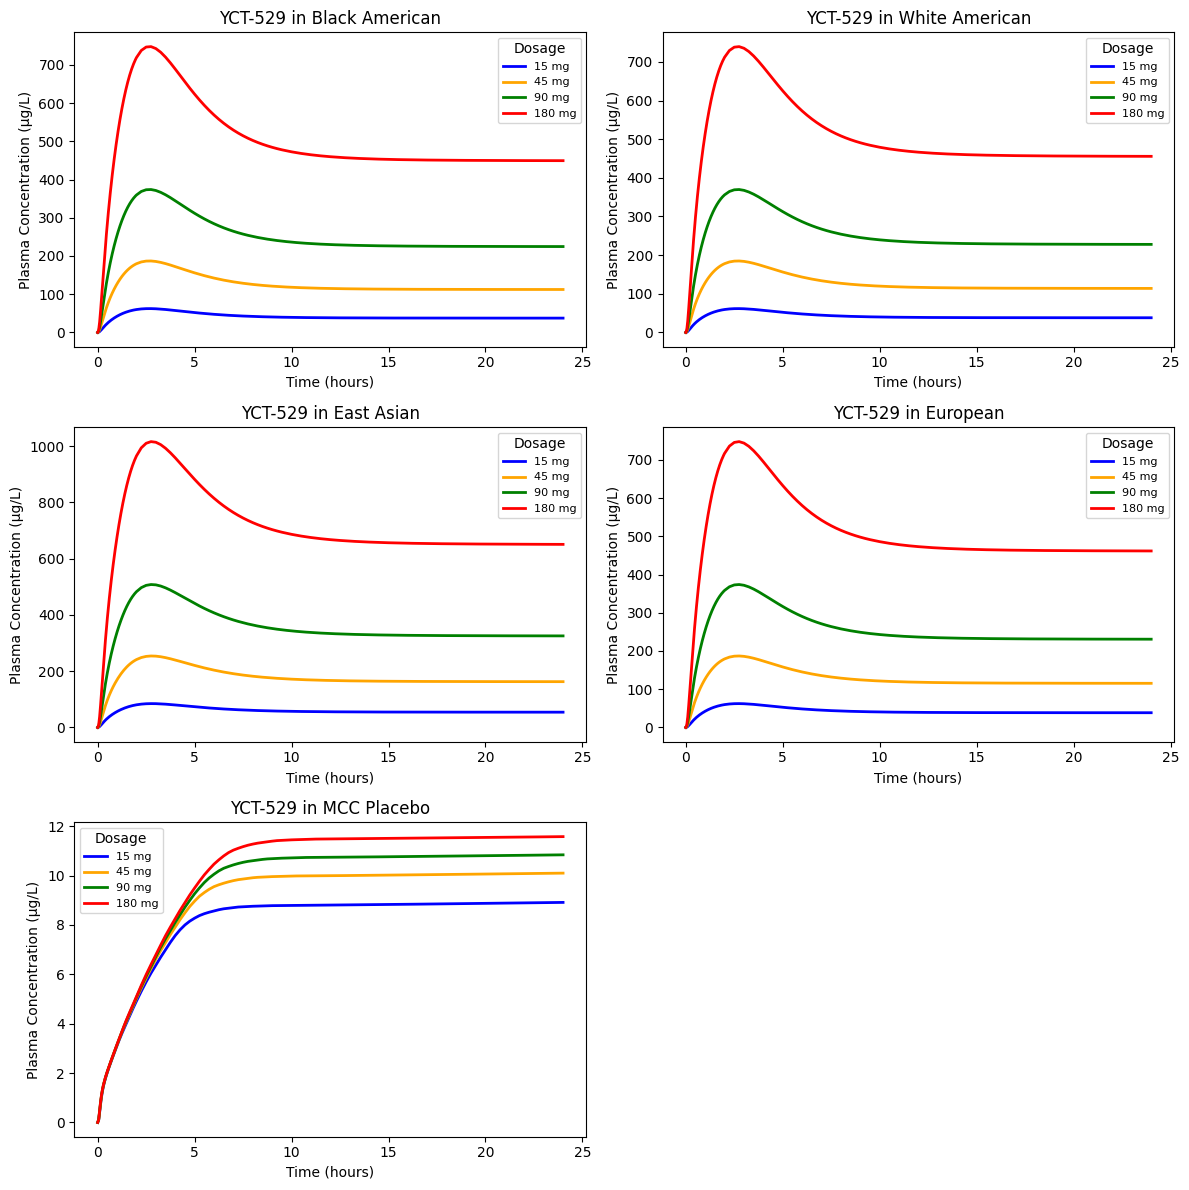

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "Black American": {
        "results": "BAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "BAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "White American": {
        "results": "WAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "WAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "East Asian": {
        "results": "EastAsianMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EastAsianMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "European": {
        "results": "EuroMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EuroMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "MCC Placebo": {
        "results": "MCC Placebo Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "MCC Placebo Aggregated Sim Protocol-PK-Analyses.csv"
    }
}

# Define colors for different doses
dose_colors = {
    15: "blue",
    45: "orange",
    90: "green",
    180: "red"
}

# Set up subplots (2 columns, multiple rows)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))  # Adjust rows to fit all races
axes = axes.flatten()  # Flatten to make indexing easier

# Process and plot data for each race
for idx, (race, files) in enumerate(file_paths.items()):
    # Load results data
    df_results = pd.read_csv(files["results"])

    # Convert time from minutes to hours
    df_results["Time (hours)"] = df_results["Time [min]"] / 60

    ax = axes[idx]  # Select subplot

    # Plot for each dosage level
    for dose in df_results["Dosage (mg)"].unique():
        df_dose = df_results[df_results["Dosage (mg)"] == dose]

        # Group by time and compute mean concentration
        grouped = df_dose.groupby("Time (hours)")["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"]
        mean_conc = grouped.mean() * 1000  # Convert µmol/L to µg/L

        ax.plot(mean_conc.index, mean_conc, label=f"{dose} mg", color=dose_colors[dose], linewidth=2)

    # Formatting the subplot
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Plasma Concentration (µg/L)")
    ax.set_title(f"YCT-529 in {race}")
    ax.legend(title="Dosage", fontsize=8)
    ax.grid(False)

# Hide any empty subplots (if race count is odd)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


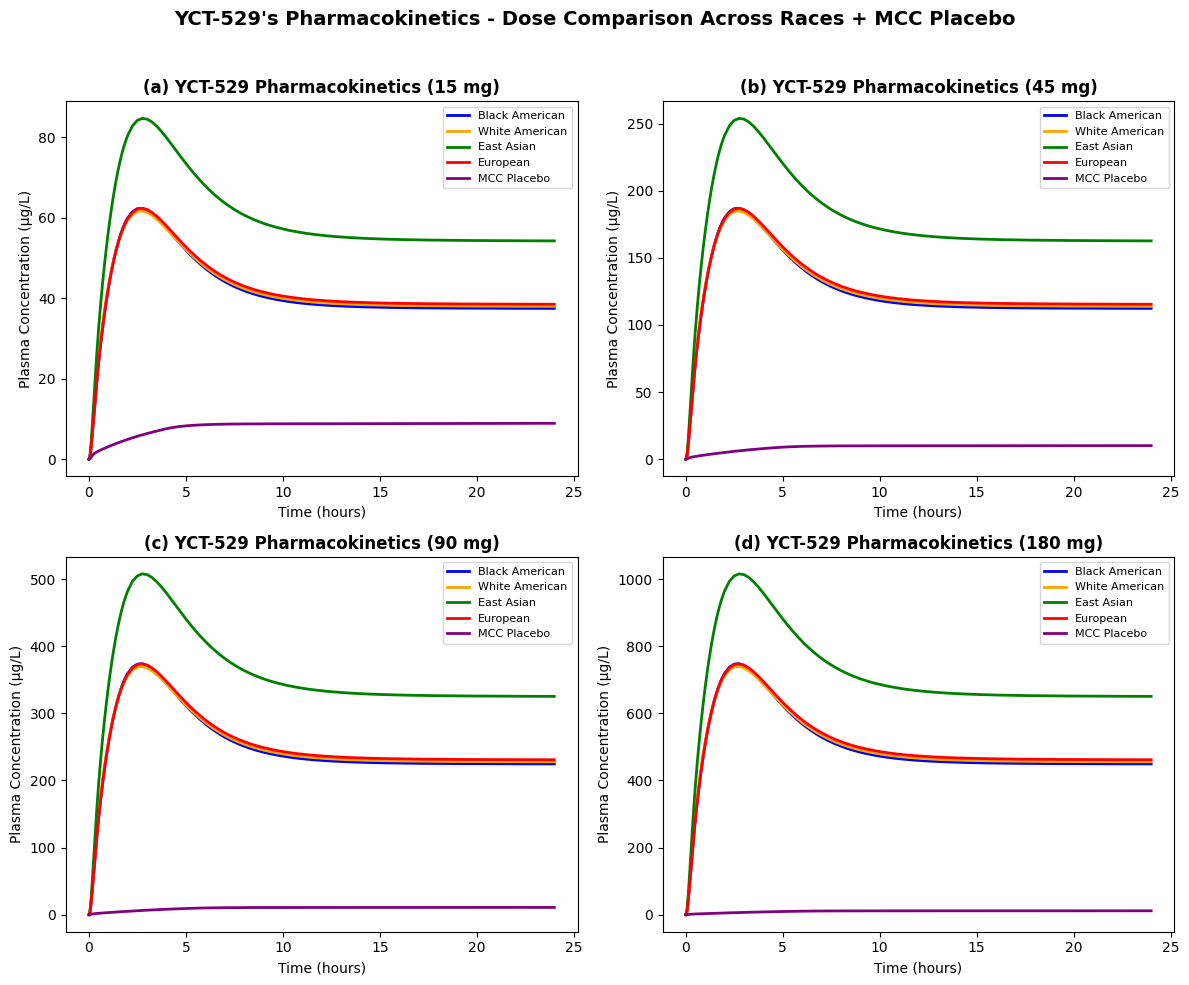

In [9]:
# Define colors for different races
race_colors = {
    "Black American": "blue",
    "White American": "orange",
    "East Asian": "green",
    "European": "red",
    "MCC Placebo": "purple"
}

# Define subplot labels
subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

# Set up subplots (2 columns, 2 rows for 4 doses)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Process and plot data for each dosage
for idx, (dose, label) in enumerate(zip([15, 45, 90, 180], subplot_labels)):
    ax = axes[idx]  # Select subplot

    for race, files in file_paths.items():
        # Load results data
        df_results = pd.read_csv(files["results"])

        # Convert time from minutes to hours
        df_results["Time (hours)"] = df_results["Time [min]"] / 60

        # Filter for the given dose
        df_dose = df_results[df_results["Dosage (mg)"] == dose]

        # Group by time and compute mean concentration
        grouped = df_dose.groupby("Time (hours)")["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"]
        mean_conc = grouped.mean() * 1000  # Convert µmol/L to µg/L

        ax.plot(mean_conc.index, mean_conc, label=race, color=race_colors[race], linewidth=2)

    # Formatting the subplot
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Plasma Concentration (µg/L)")
    ax.set_title(f"{label} YCT-529 Pharmacokinetics ({dose} mg)", fontsize=12, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(False)

# Add overall title for all subplots
fig.suptitle("YCT-529's Pharmacokinetics - Dose Comparison Across Races + MCC Placebo", fontsize=14, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space at the top for the title
plt.show()

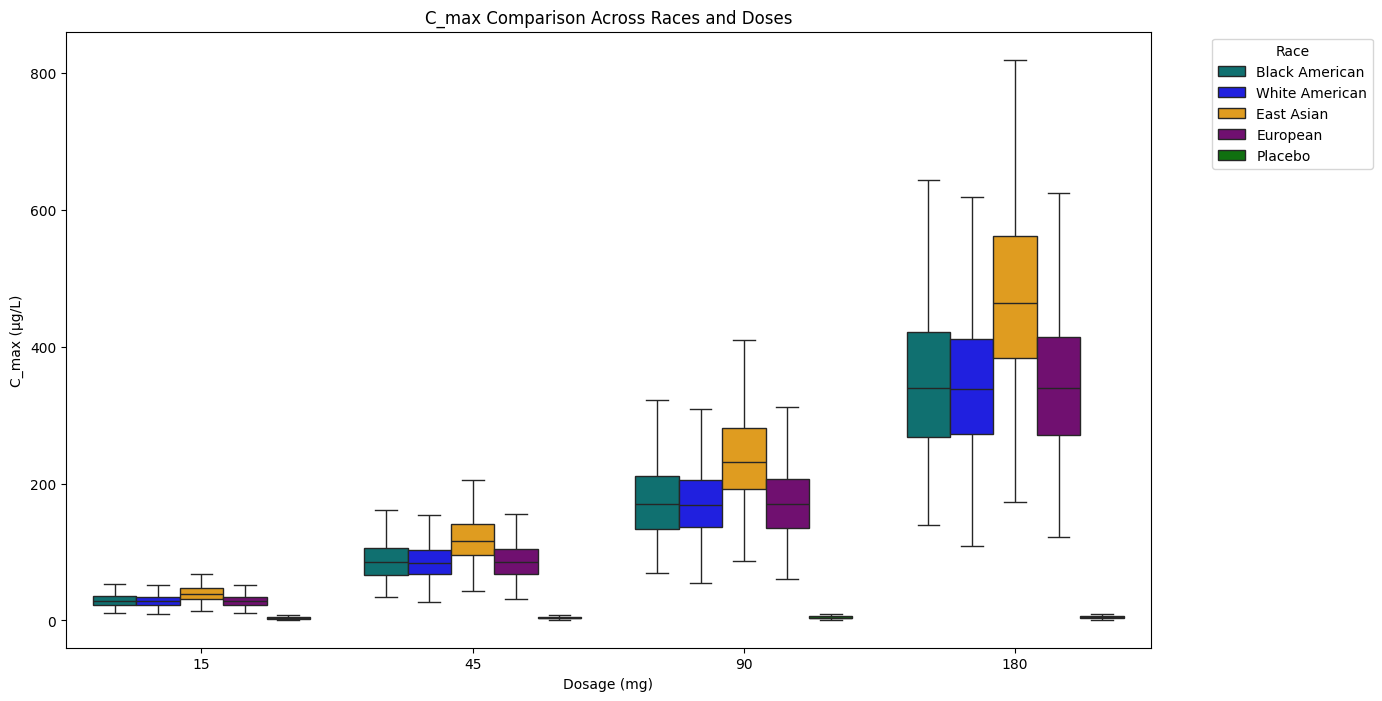

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
file_paths = {
    "Black American": {
        "pk_analysis": "BAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "White American": {
        "pk_analysis": "WAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "East Asian": {
        "pk_analysis": "EastAsianMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "European": {
        "pk_analysis": "EuroMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "Placebo": {
        "pk_analysis": "MCC Placebo Aggregated Sim Protocol-PK-Analyses.csv"
    }
}

# Define an empty list to store C_max data
cmax_data = []

# Iterate through races and files to extract C_max values
for race, files in file_paths.items():
    df_pk = pd.read_csv(files["pk_analysis"])

    # Convert C_max from µmol/L to µg/L
    df_pk["C_max (µg/L)"] = df_pk["Value"] * 435.5  # Molar mass conversion

    # Extract relevant columns
    df_filtered = df_pk[df_pk["Parameter"] == "C_max"][["Dosage (mg)", "C_max (µg/L)"]]
    df_filtered["Race"] = race  # Add race column

    # Append to list
    cmax_data.append(df_filtered)

# Combine all race data into a single dataframe
df_cmax_all = pd.concat(cmax_data, ignore_index=True)

# Define colors for different races
race_palette = {
    "Black American": "teal",
    "White American": "blue",
    "East Asian": "orange",
    "European": "purple",
    "Placebo": "green"
}

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cmax_all, x="Dosage (mg)", y="C_max (µg/L)", hue="Race", palette=race_palette, showfliers=False)

# Customizations
plt.xlabel("Dosage (mg)")
plt.ylabel("C_max (µg/L)")
plt.title("C_max Comparison Across Races and Doses")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(False)

# Show plot
plt.show()


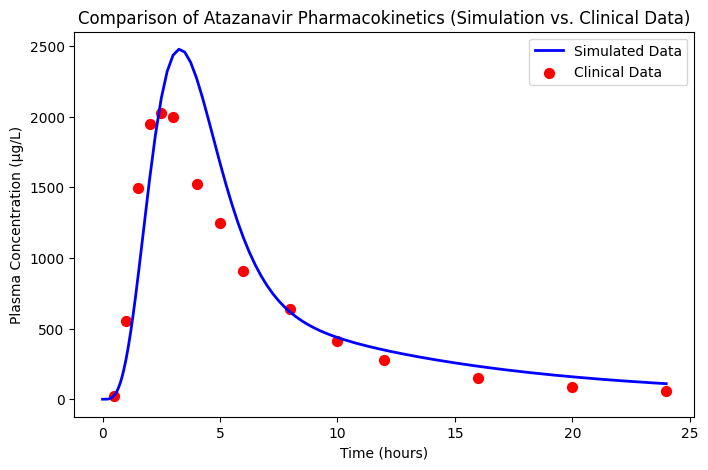

In [11]:
# Load the simulation results
sim_results = pd.read_csv("Atazanavir-Results.csv")

# Load the clinical data
clinical_data = pd.read_csv("Atazanavir Clinical Data.csv")

# Convert time from minutes to hours in the simulation data
sim_results["Time (hours)"] = sim_results["Time [min]"] / 60

# Convert plasma concentration from µmol/L to µg/L (Atazanavir has a molar mass of 705.84 g/mol)
sim_results["Plasma Concentration (µg/L)"] = (
    sim_results["Organism|VenousBlood|Plasma|Atazanavir|Concentration in container [µmol/l]"] * 705.84
)

# Plot the results
plt.figure(figsize=(8, 5))

# Plot simulation results as a line
plt.plot(
    sim_results["Time (hours)"],
    sim_results["Plasma Concentration (µg/L)"],
    label="Simulated Data",
    color="blue",
    linewidth=2
)

# Plot clinical data as dots
plt.scatter(
    clinical_data["Time [h]"],
    clinical_data["Avg [µg/l]"],
    label="Clinical Data",
    color="red",
    marker="o",
    s=50  # Dot size
)

# Labels and title
plt.xlabel("Time (hours)")
plt.ylabel("Plasma Concentration (µg/L)")
plt.title("Comparison of Atazanavir Pharmacokinetics (Simulation vs. Clinical Data)")
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

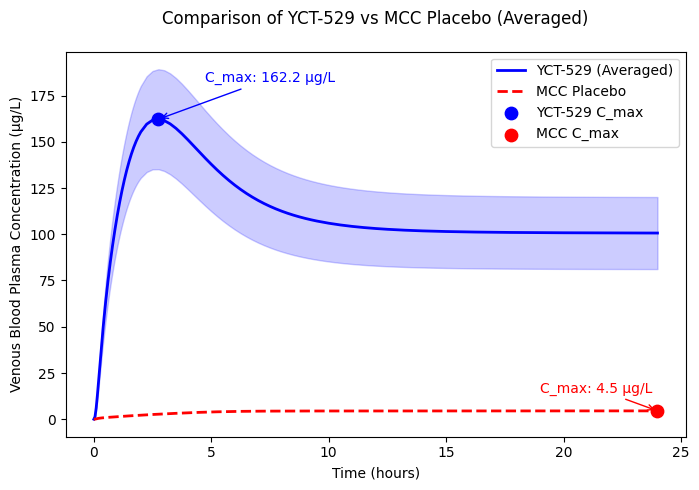

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "Black American": "BAM Aggregated Sim Protocol-Results.csv",
    "White American": "WAM Aggregated Sim Protocol-Results.csv",
    "East Asian": "EastAsianMen Aggregated Sim Protocol-Results.csv",
    "European": "EuroMen Aggregated Sim Protocol-Results.csv",
    "MCC Placebo": "MCC Placebo Aggregated Sim Protocol-Results.csv"
}

# Initialize dictionaries to store data
race_data = {}
time_points = None

# Load and process each race's data
for race, file in file_paths.items():
    df = pd.read_csv(file)

    # Convert time from minutes to hours
    df["Time (hours)"] = df["Time [min]"] / 60

    # Extract venous plasma concentration
    plasma_col = "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"

    # Convert plasma concentration from µmol/L to µg/L (Molar mass of YCT-529 = 435.5 g/mol)
    df["Plasma Concentration (µg/L)"] = df[plasma_col] * 435.5

    # Get unique time points
    if time_points is None:
        time_points = df["Time (hours)"].unique()

    # Compute average for each time point
    avg_concentration = df.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()
    race_data[race] = avg_concentration

# Compute the **average across all racial groups** for YCT-529 (excluding MCC)
yct_529_mean = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).mean(axis=1)
yct_529_std = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).std(axis=1)

# Compute the **MCC placebo directly** by averaging its different dosages
df_mcc = pd.read_csv(file_paths["MCC Placebo"])
df_mcc["Time (hours)"] = df_mcc["Time [min]"] / 60
df_mcc["Plasma Concentration (µg/L)"] = df_mcc[plasma_col] * 435.5
mcc_mean = df_mcc.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()

# Identify C_max (peak values)
yct_529_cmax_time = yct_529_mean.idxmax()
yct_529_cmax_value = yct_529_mean.max()

mcc_cmax_time = mcc_mean.idxmax()
mcc_cmax_value = mcc_mean.max()

# Plot the results
plt.figure(figsize=(8, 5))

# Plot YCT-529 with standard deviation shading
plt.plot(time_points, yct_529_mean, label="YCT-529 (Averaged)", color="blue", linewidth=2)
plt.fill_between(time_points, yct_529_mean - yct_529_std, yct_529_mean + yct_529_std, color="blue", alpha=0.2)

# Plot MCC placebo
plt.plot(time_points, mcc_mean, label="MCC Placebo", color="red", linewidth=2, linestyle="dashed")

# Annotate C_max values with adjusted positions
plt.scatter(yct_529_cmax_time, yct_529_cmax_value, color="blue", marker="o", s=80, label="YCT-529 C_max")
plt.annotate(
    f"C_max: {yct_529_cmax_value:.1f} µg/L",
    xy=(yct_529_cmax_time, yct_529_cmax_value),
    xytext=(yct_529_cmax_time + 2, yct_529_cmax_value + 20),  # Shift annotation lower to avoid title
    arrowprops=dict(arrowstyle="->", color="blue"),
    fontsize=10, color="blue"
)

plt.scatter(mcc_cmax_time, mcc_cmax_value, color="red", marker="o", s=80, label="MCC C_max")
plt.annotate(
    f"C_max: {mcc_cmax_value:.1f} µg/L",
    xy=(mcc_cmax_time, mcc_cmax_value),
    xytext=(mcc_cmax_time - 5, mcc_cmax_value + 10),  # Keep this clean as well
    arrowprops=dict(arrowstyle="->", color="red"),
    fontsize=10, color="red"
)

# Labels and title
plt.xlabel("Time (hours)")
plt.ylabel("Venous Blood Plasma Concentration (µg/L)")
plt.title("Comparison of YCT-529 vs MCC Placebo (Averaged)", pad=20)  # Add padding to avoid overlap
plt.legend()
plt.grid(False)

# Show plot
plt.show()


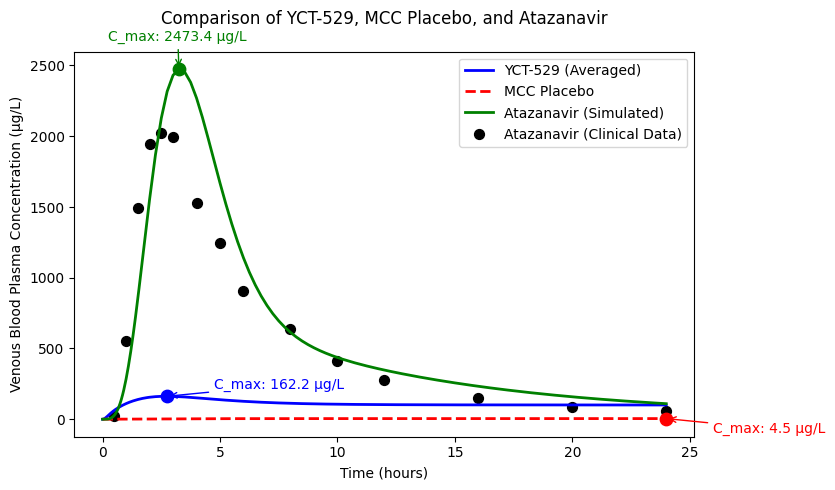

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "Black American": "BAM Aggregated Sim Protocol-Results.csv",
    "White American": "WAM Aggregated Sim Protocol-Results.csv",
    "East Asian": "EastAsianMen Aggregated Sim Protocol-Results.csv",
    "European": "EuroMen Aggregated Sim Protocol-Results.csv",
    "MCC Placebo": "MCC Placebo Aggregated Sim Protocol-Results.csv"
}

atazanavir_sim_file = "Atazanavir-Results.csv"
atazanavir_clinical_file = "Atazanavir Clinical Data.csv"

# Molecular weights (needed for unit conversion)
MW_YCT_529 = 435.5  # g/mol
MW_Atazanavir = 704.9  # g/mol

# Initialize dictionaries to store data
race_data = {}
time_points = None

# Load and process each race's data
for race, file in file_paths.items():
    df = pd.read_csv(file)

    # Convert time from minutes to hours
    df["Time (hours)"] = df["Time [min]"] / 60

    # Extract venous plasma concentration and convert from µmol/L to µg/L
    plasma_col = "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"
    df["Plasma Concentration (µg/L)"] = df[plasma_col] * MW_YCT_529

    if time_points is None:
        time_points = df["Time (hours)"].unique()

    # Compute average for each time point
    avg_concentration = df.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()
    race_data[race] = avg_concentration

# Compute **average across all racial groups** for YCT-529 (excluding MCC)
yct_529_mean = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).mean(axis=1)
yct_529_std = pd.DataFrame(race_data).drop(columns=["MCC Placebo"]).std(axis=1)

# **Compute MCC Placebo by averaging across its different dosages**
df_mcc = pd.read_csv(file_paths["MCC Placebo"])
df_mcc["Time (hours)"] = df_mcc["Time [min]"] / 60
df_mcc["Plasma Concentration (µg/L)"] = df_mcc[plasma_col] * MW_YCT_529
mcc_mean = df_mcc.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()

# Identify C_max (peak values)
yct_529_cmax_time = yct_529_mean.idxmax()
yct_529_cmax_value = yct_529_mean.max()

mcc_cmax_time = mcc_mean.idxmax()
mcc_cmax_value = mcc_mean.max()

# Load **Atazanavir simulation results**
ataz_sim_df = pd.read_csv(atazanavir_sim_file)
ataz_sim_df["Time (hours)"] = ataz_sim_df["Time [min]"] / 60
plasma_col_ataz = "Organism|VenousBlood|Plasma|Atazanavir|Concentration in container [µmol/l]"
ataz_sim_df["Plasma Concentration (µg/L)"] = ataz_sim_df[plasma_col_ataz] * MW_Atazanavir

ataz_sim_mean = ataz_sim_df.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()
ataz_cmax_time = ataz_sim_mean.idxmax()
ataz_cmax_value = ataz_sim_mean.max()

# Load **Atazanavir clinical data**
ataz_clinical_df = pd.read_csv(atazanavir_clinical_file)
ataz_clinical_df.rename(columns={"Time [h]": "Time (hours)", "Avg [µg/l]": "Plasma Concentration (µg/L)"}, inplace=True)

# **Plot the results**
plt.figure(figsize=(8, 5))

# **Plot YCT-529 with standard deviation shading**
plt.plot(time_points, yct_529_mean, label="YCT-529 (Averaged)", color="blue", linewidth=2)

# **Plot MCC Placebo**
plt.plot(time_points, mcc_mean, label="MCC Placebo", color="red", linewidth=2, linestyle="dashed")

# **Plot Atazanavir simulation results**
plt.plot(ataz_sim_mean.index, ataz_sim_mean, label="Atazanavir (Simulated)", color="green", linewidth=2)

# **Plot Atazanavir clinical data as scatter points**
plt.scatter(ataz_clinical_df["Time (hours)"], ataz_clinical_df["Plasma Concentration (µg/L)"],
            color="black", marker="o", s=50, label="Atazanavir (Clinical Data)")

# **Annotate C_max values for all datasets**
plt.scatter(yct_529_cmax_time, yct_529_cmax_value, color="blue", marker="o", s=80)
plt.annotate(
    f"C_max: {yct_529_cmax_value:.1f} µg/L",
    xy=(yct_529_cmax_time, yct_529_cmax_value),
    xytext=(yct_529_cmax_time + 2, yct_529_cmax_value + 50),  # Adjusted position
    arrowprops=dict(arrowstyle="->", color="blue"),
    fontsize=10, color="blue"
)

plt.scatter(mcc_cmax_time, mcc_cmax_value, color="red", marker="o", s=80)
plt.annotate(
    f"C_max: {mcc_cmax_value:.1f} µg/L",
    xy=(mcc_cmax_time, mcc_cmax_value),
    xytext=(mcc_cmax_time + 2, mcc_cmax_value - 100),  # Moved further away
    arrowprops=dict(arrowstyle="->", color="red"),
    fontsize=10, color="red"
)

plt.scatter(ataz_cmax_time, ataz_cmax_value, color="green", marker="o", s=80)
plt.annotate(
    f"C_max: {ataz_cmax_value:.1f} µg/L",
    xy=(ataz_cmax_time, ataz_cmax_value),
    xytext=(ataz_cmax_time - 3, ataz_cmax_value + 200),  # Adjusted position
    arrowprops=dict(arrowstyle="->", color="green"),
    fontsize=10, color="green"
)

# **Labels and title**
plt.xlabel("Time (hours)")
plt.ylabel("Venous Blood Plasma Concentration (µg/L)")
plt.title("Comparison of YCT-529, MCC Placebo, and Atazanavir", pad=20)
plt.legend()
plt.grid(False)

# **Show plot**
plt.show()


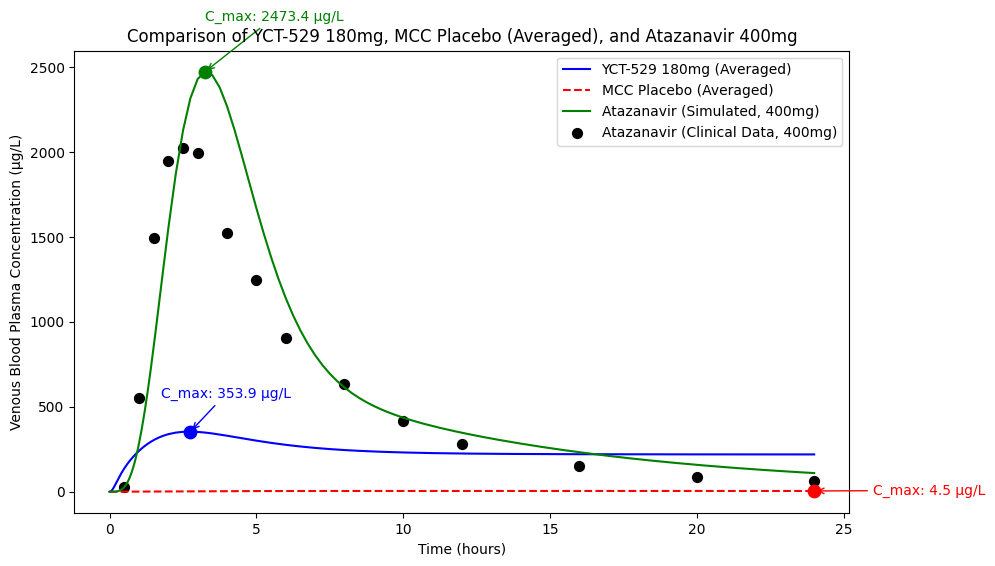

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "Black American": {
        "results": "BAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "BAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "White American": {
        "results": "WAM Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "WAM Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "East Asian": {
        "results": "EastAsianMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EastAsianMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "European": {
        "results": "EuroMen Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "EuroMen Aggregated Sim Protocol-PK-Analyses.csv"
    },
    "MCC Placebo": {
        "results": "MCC Placebo Aggregated Sim Protocol-Results.csv",
        "pk_analysis": "MCC Placebo Aggregated Sim Protocol-PK-Analyses.csv"
    }
}

# **Load and process YCT-529 (180mg) data for all races**
race_dfs = []
for race, paths in file_paths.items():
    if race != "MCC Placebo":  # Exclude MCC Placebo for now
        df = pd.read_csv(paths["results"])
        df = df[df["Dosage (mg)"] == 180]  # Filter for 180mg dose
        race_dfs.append(df)

# Concatenate all race data
all_race_180mg_df = pd.concat(race_dfs)

# Group by time and compute the mean and standard deviation
yct_529_180mg_avg = all_race_180mg_df.groupby("Time [min]")[
    "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"].agg(["mean", "std"]).reset_index()

# Convert to proper units (µmol/L to µg/L)
YCT_529_MW = 435.5  # Molecular weight of YCT-529
yct_529_180mg_avg["Time (hours)"] = yct_529_180mg_avg["Time [min]"] / 60
yct_529_180mg_avg["Mean Conc (µg/L)"] = yct_529_180mg_avg["mean"] * YCT_529_MW
yct_529_180mg_avg["Std Conc (µg/L)"] = yct_529_180mg_avg["std"] * YCT_529_MW

# **Compute MCC Placebo by averaging across its different dosages**
df_mcc = pd.read_csv(file_paths["MCC Placebo"]["results"])
df_mcc["Time (hours)"] = df_mcc["Time [min]"] / 60
df_mcc["Plasma Concentration (µg/L)"] = df_mcc[
    "Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"] * YCT_529_MW
mcc_mean = df_mcc.groupby("Time (hours)")["Plasma Concentration (µg/L)"].mean()

# Load Atazanavir Data
atazanavir_sim_df = pd.read_csv("Atazanavir-Results.csv")
atazanavir_clinical_df = pd.read_csv("Atazanavir Clinical Data.csv")

# Convert Atazanavir Simulated data
Atazanavir_MW = 704.9  # Molecular weight of Atazanavir
atazanavir_sim_df["Time (hours)"] = atazanavir_sim_df["Time [min]"] / 60
atazanavir_sim_df["Conc (µg/L)"] = atazanavir_sim_df[
    "Organism|VenousBlood|Plasma|Atazanavir|Concentration in container [µmol/l]"] * Atazanavir_MW

# Convert Atazanavir Clinical Data
atazanavir_clinical_df["Time (hours)"] = atazanavir_clinical_df["Time [h]"]
atazanavir_clinical_df["Conc (µg/L)"] = atazanavir_clinical_df["Avg [µg/l]"]

# **Identify C_max values**
yct_529_180mg_cmax_time = yct_529_180mg_avg["Time (hours)"][yct_529_180mg_avg["Mean Conc (µg/L)"].idxmax()]
yct_529_180mg_cmax = yct_529_180mg_avg["Mean Conc (µg/L)"].max()

mcc_cmax_time = mcc_mean.idxmax()
mcc_cmax_value = mcc_mean.max()

atazanavir_sim_cmax_time = atazanavir_sim_df["Time (hours)"][atazanavir_sim_df["Conc (µg/L)"].idxmax()]
atazanavir_sim_cmax = atazanavir_sim_df["Conc (µg/L)"].max()

# **Plot**
plt.figure(figsize=(10, 6))

# Plot YCT-529 180mg (Averaged)
plt.plot(yct_529_180mg_avg["Time (hours)"], yct_529_180mg_avg["Mean Conc (µg/L)"], color="blue", label="YCT-529 180mg (Averaged)")

# Plot MCC Placebo (Averaged across all dosages)
plt.plot(mcc_mean.index, mcc_mean, color="red", linestyle="dashed", label="MCC Placebo (Averaged)")

# Plot Atazanavir Simulated (400mg)
plt.plot(atazanavir_sim_df["Time (hours)"], atazanavir_sim_df["Conc (µg/L)"], color="green", label="Atazanavir (Simulated, 400mg)")

# Plot Atazanavir Clinical Data (400mg)
plt.scatter(atazanavir_clinical_df["Time (hours)"], atazanavir_clinical_df["Conc (µg/L)"],
            color="black", label="Atazanavir (Clinical Data, 400mg)", marker="o", s=50)

# **Annotate C_max values**
plt.scatter(yct_529_180mg_cmax_time, yct_529_180mg_cmax, color="blue", marker="o", s=80)
plt.annotate(f"C_max: {yct_529_180mg_cmax:.1f} µg/L",
             xy=(yct_529_180mg_cmax_time, yct_529_180mg_cmax),
             xytext=(yct_529_180mg_cmax_time - 1, yct_529_180mg_cmax + 200),
             arrowprops=dict(arrowstyle="->", color="blue"), fontsize=10, color="blue")

plt.scatter(mcc_cmax_time, mcc_cmax_value, color="red", marker="o", s=80)
plt.annotate(f"C_max: {mcc_cmax_value:.1f} µg/L",
             xy=(mcc_cmax_time, mcc_cmax_value),
             xytext=(mcc_cmax_time + 2, mcc_cmax_value - 20),
             arrowprops=dict(arrowstyle="->", color="red"), fontsize=10, color="red", ha="left")

plt.scatter(atazanavir_sim_cmax_time, atazanavir_sim_cmax, color="green", marker="o", s=80)
plt.annotate(f"C_max: {atazanavir_sim_cmax:.1f} µg/L",
             xy=(atazanavir_sim_cmax_time, atazanavir_sim_cmax),
             xytext=(atazanavir_sim_cmax_time, atazanavir_sim_cmax + 300),
             arrowprops=dict(arrowstyle="->", color="green"), fontsize=10, color="green")

plt.title("Comparison of YCT-529 180mg, MCC Placebo (Averaged), and Atazanavir 400mg")
plt.xlabel("Time (hours)")
plt.ylabel("Venous Blood Plasma Concentration (µg/L)")
plt.legend()
plt.grid(False)

plt.show()


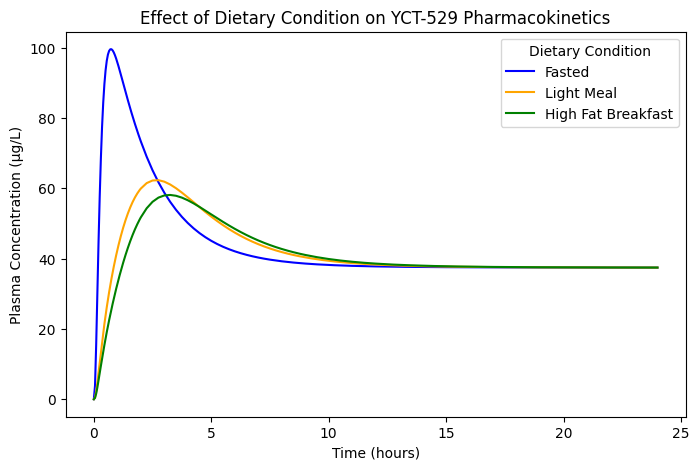

<ipython-input-3-d7b9aba51313>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Dietary Condition", y="Plasma Concentration (µg/L)",


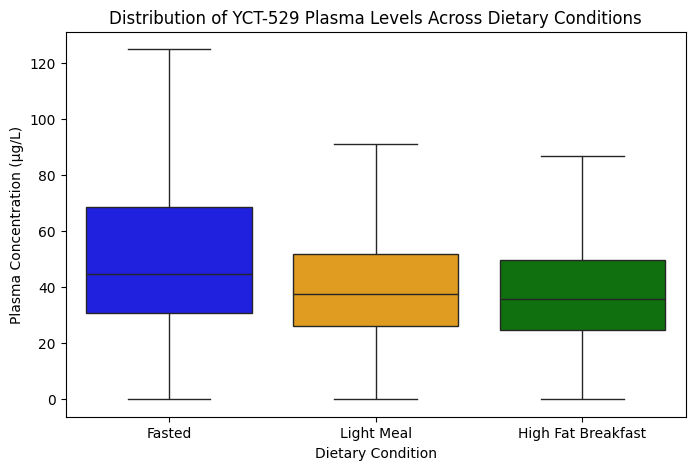

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "Meal State Aggregated Results.csv"
df = pd.read_csv(file_path)

# Convert time to hours for clarity
df["Time [h]"] = df["Time [min]"] / 60

# Rename column for clarity
df.rename(columns={"Meal": "Dietary Condition"}, inplace=True)

# Convert concentration to µg/L
df["Plasma Concentration (µg/L)"] = df["Organism|VenousBlood|Plasma|YCT-529|Concentration in container [µmol/l]"] * 1000

# Define colors for dietary conditions
colors = {"Fasted": "blue", "Light Meal": "orange", "High Fat Breakfast": "green"}

# -------- LINE PLOT: Time vs. Plasma Concentration with C_max --------
plt.figure(figsize=(8, 5))

# Line plot without markers
sns.lineplot(data=df, x="Time [h]", y="Plasma Concentration (µg/L)", hue="Dietary Condition", palette=colors, errorbar=None)

# Customizations
plt.xlabel("Time (hours)")
plt.ylabel("Plasma Concentration (µg/L)")
plt.title("Effect of Dietary Condition on YCT-529 Pharmacokinetics")
plt.legend(title="Dietary Condition")
plt.grid(False)
plt.show()


# -------- BOX PLOT: Plasma Concentration Distributions --------
plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x="Dietary Condition", y="Plasma Concentration (µg/L)",
            palette=colors, showfliers=False)  # Removed unwanted outliers display

plt.xlabel("Dietary Condition")
plt.ylabel("Plasma Concentration (µg/L)")
plt.title("Distribution of YCT-529 Plasma Levels Across Dietary Conditions")
plt.show()
